# Compare our values to Nirody et al. 2021
<br>
This notebook = speed vs. step parameters <br>
  ... in Nirody this is:<br>

### Figure 2
### Figure 3
### Figure S1
### Figure S5

# Also do new things:
* Size vs speed (both body length and raw speed)
* Size vs everything . . . length and area and/or some sort of LENGTH/WIDTH ratio
* --> fatness or egginess
* Speed vs. anterior offset, opposite offset
* Speed vs. coordination strength


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import gaitFunctions
import plotClip
from scipy import stats
import seaborn as sns

In [2]:
# navigate to directory that contains the data
os.chdir('/Users/iwoods/OneDrive - Ithaca College/movement_disorder_paper_2023/videos_exemplaris/analyses_summaries/')
for f in sorted(glob.glob('*.xlsx')):
    print(f)

4Jan_combined_21Dec_11Dec_9Nov.xlsx
iw_11Dec23_exemplaris_inverted_combined.xlsx
iw_21Dec23_exemplaris_inverted_combined.xlsx
iw_9Nov23_exemplaris_inverted_combined.xlsx


In [3]:
# specify the data file
data_file = '4Jan_combined_21Dec_11Dec_9Nov.xlsx'

# Nirody Figure 2

n =  3267 strides are shown
ρ = 1.0 p = 0.0


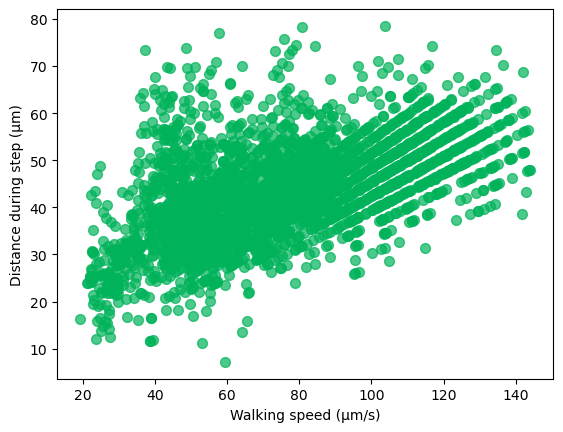

In [4]:
'''
Figure 2A
walking speed vs. step amplitude

Paper text:
"Step amplitude, defined as the distance between the posterior extreme position (PEP) 
measured at liftoff of a leg at the start of a swing and the anterior extreme position 
(AEP) measured at touchdown of the same leg at the end of swing, increases with forward 
walking speed (Fig. 2A)."

Figure legend:
"Stride length (A) smoothly increases ... with walking speed"

Methods:
"Correlation coefficients between variables were calculated over the entire observed 
walking speed range; we used Spearman ρ to determine correlation due to the nonlinear 
relationships between several of our kinematic variables."

NOTES:  
1. I am only including data when the tardigrades are 'cruising' = not in a stop or a 
turn . . .

2. We define step distance differently = distance traveled by tardigrade during gait cycle.
So this is always going to be correlated to speed. Consider measuring amplitudes . . . 
(lots of re-stepping work)

'''

# load the step_timing data into a dataframe
step_df = pd.read_excel(data_file, sheet_name='step_timing', index_col=None)

# only include lateral legs
step_df = step_df[step_df['legID'].isin(['L1','L2','L3','R1','R2','R3'])]

speed_during_steps_scaled = step_df['speed_during_step_scaled'].values * 1000
distance_during_steps_scaled = step_df['distance_during_step_scaled'].values * 1000
marker_color = '#00b35a'

plt.scatter(speed_during_steps_scaled,distance_during_steps_scaled,c=marker_color,s=50,alpha=0.7)
plt.ylabel('Distance during step (µm)')
plt.xlabel('Walking speed (µm/s)')
print('n = ', len(speed_during_steps_scaled), 'strides are shown')

r,p = stats.spearmanr(speed_during_steps_scaled,speed_during_steps_scaled)
print('ρ =', np.round(r,2), 'p =', np.round(p,2))

plt.show()

n =  3267 strides are shown
ρ = -0.79 p = 0.0


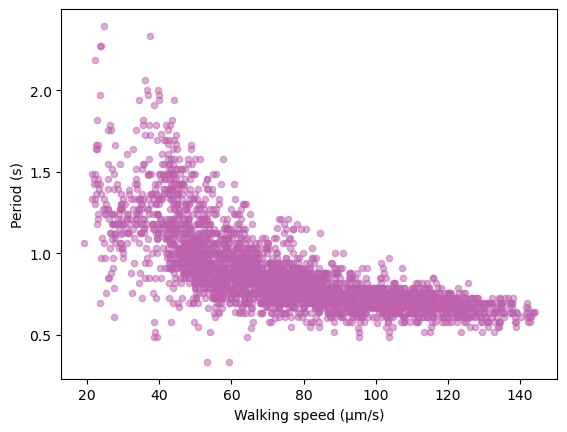

In [5]:
'''
Figure 2B
Forward walking speed vs. Stride period (gait cycle)

"Stride period decreases with walking speed, plateauing at walking speeds of 
approximately v > 100 μm/s (Fig. 2B)."
'''

# load the step_timing data into a dataframe
step_df = pd.read_excel(data_file, sheet_name='step_timing', index_col=None)

# only include lateral legs
step_df = step_df[step_df['legID'].isin(['L1','L2','L3','R1','R2','R3'])]

speed_during_steps_scaled = step_df['speed_during_step_scaled'].values * 1000
gait_cycles = step_df['gait'].values
marker_color = '#bd61ae'

plt.scatter(speed_during_steps_scaled,gait_cycles,c=marker_color,s=20,alpha=0.5)
plt.ylabel('Period (s)')
plt.xlabel('Walking speed (µm/s)')
print('n = ', len(speed_during_steps_scaled), 'strides are shown')

r,p = stats.spearmanr(speed_during_steps_scaled,gait_cycles)
print('ρ =', np.round(r,2), 'p =', np.round(p,2))

plt.show()

n =  3267 strides are shown
Swing: ρ = -0.27 p = 0.0
Stance: ρ = -0.77 p = 0.0


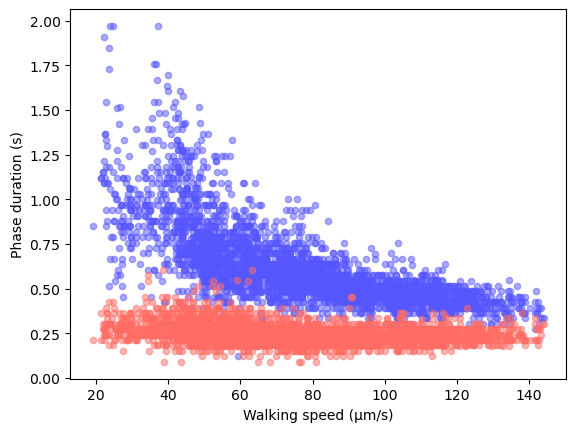

In [6]:
'''
Figure 2C
walking speed vs. stance and swing duration

"As speed increases, stance duration is modulated strongly while swing 
duration remains relatively constant (Fig. 2C). 

Both stance duration and stride period show a hyperbolic relationship 
with speed, as observed in insects [Drosophila (13), stick insect Carausius 
morosus (29), and desert ant Cataglyphyis fortis (30)]. In line with studies 
in arthropods, we find that swing duration is coordinated with stride period 
(ρ = 0.54, P < 0.001)."
'''

# load the step_timing data into a dataframe
step_df = pd.read_excel(data_file, sheet_name='step_timing', index_col=None)

# only include lateral legs
step_df = step_df[step_df['legID'].isin(['L1','L2','L3','R1','R2','R3'])]

speed_during_steps_scaled = step_df['speed_during_step_scaled'].values * 1000
stance_durations = step_df['stance'].values
swing_durations = step_df['swing'].values
stance_color = '#5656ff'
swing_color = '#ff6c64'

plt.scatter(speed_during_steps_scaled,stance_durations,c=stance_color,s=20,alpha=0.5)
plt.scatter(speed_during_steps_scaled,swing_durations,c=swing_color,s=20,alpha=0.5)
plt.ylabel('Phase duration (s)')
plt.xlabel('Walking speed (µm/s)')
print('n = ', len(speed_during_steps_scaled), 'strides are shown')

r,p = stats.spearmanr(speed_during_steps_scaled,swing_durations)
print('Swing: ρ =', np.round(r,2), 'p =', np.round(p,2))

r,p = stats.spearmanr(speed_during_steps_scaled,stance_durations)
print('Stance: ρ =', np.round(r,2), 'p =', np.round(p,2))

plt.show()

# Nirody Figure 3

n =  3267 strides are shown
Duty Factor: ρ = -0.51 p = 0.0


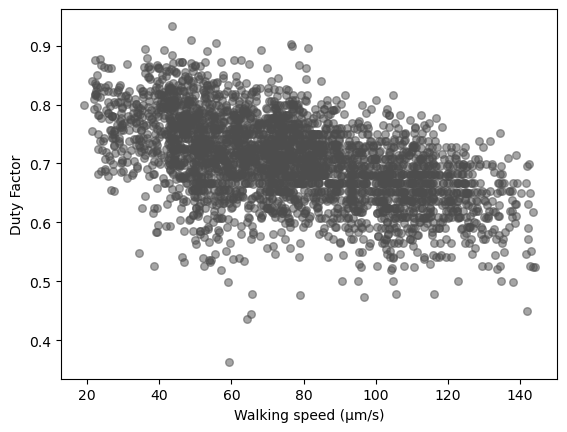

In [7]:
'''
Figure 3
Walking Speed vs. duty factor

"Tardigrades maintain a relatively constant duty factor across all 
observed forward walking speeds; we find a weak negative correlation
between duty factor and walking speed (ρ = −0.33, P < 0.001)"
'''

# load the step_timing data into a dataframe
step_df = pd.read_excel(data_file, sheet_name='step_timing', index_col=None)

# only include lateral legs
step_df = step_df[step_df['legID'].isin(['L1','L2','L3','R1','R2','R3'])]

speed_during_steps_scaled = step_df['speed_during_step_scaled'].values * 1000
duty_factor = step_df['duty'].values
marker_color = '#4d4d4d'

plt.scatter(speed_during_steps_scaled,duty_factor,c=marker_color,s=30,alpha=0.5)
plt.ylabel('Duty Factor')
plt.xlabel('Walking speed (µm/s)')
print('n = ', len(speed_during_steps_scaled), 'strides are shown')

r,p = stats.spearmanr(speed_during_steps_scaled,duty_factor)
print('Duty Factor: ρ =', np.round(r,2), 'p =', np.round(p,2))

plt.show()

# Nirody Figure S1

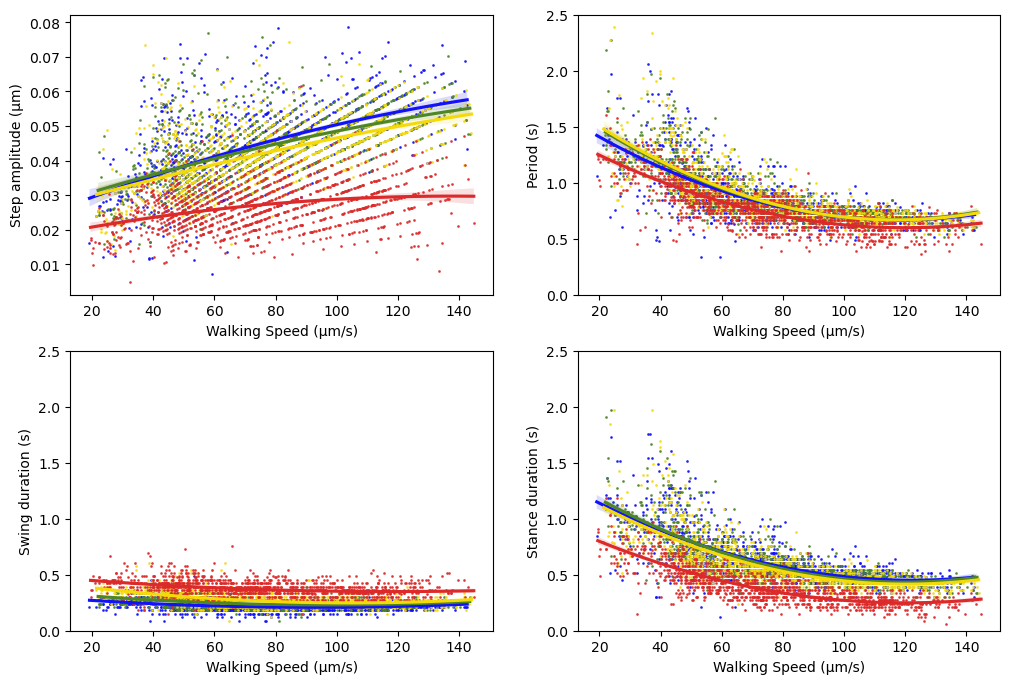

In [8]:
leg_pairs = [['L1','R1'],['L2','R2'],['L3','R3'],['L4','R4']]
pair_colors = ['#1212fa','#4e8626','#f5da0a','#db2a29']
data_desciptions = ['Step amplitude (µm)','Period (s)','Swing duration (s)','Stance duration (s)']
data_cols = ['distance_during_step_scaled','gait','swing','stance']
speed_col = 'speed_during_step_scaled'

# load the step_timing data into a dataframe
step_df = pd.read_excel(data_file, sheet_name='step_timing', index_col=None)

# set up plot
f, axes = plt.subplots(2,2,figsize=(12,8))
ax_handles = axes.reshape(1,4)[0]
for i, d in enumerate(data_desciptions):
    ax = ax_handles[i]
    for j, leg_pair in enumerate(leg_pairs):
        
        # get data for this pair for this datatype
        pair_data = step_df.copy()[step_df['legID'].isin(leg_pair)]
        pair_data[speed_col] = pair_data[speed_col].values * 1000 # convert to µm

        # scatter and regression line ... not so nice b/c cannot figure out fit
#         x_data = pair_data[speed_col].values * 1000
#         y_data = pair_data[data_cols[i]].values 
#         coefficients = np.polyfit(x_data, y_data, 2)
#         fitted_data = np.sort(np.polyval(coefficients, x_data))
#         if d in ['Period (s)','Swing duration (s)','Stance duration (s)']:
#             fitted_data = np.flip(fitted_data)
#         # scatter
#         ax.scatter(x_data,y_data,s=5,c=pair_colors[j],alpha=0.7)
#         # add fit line
#         ax.plot(np.linspace(0, np.max(x_data), len(x_data)),fitted_data,color=pair_colors[j], linewidth=2)
        
        # scatter plot and regression line from seaborn
        xcol = speed_col
        ycol = data_cols[i]
        sns.regplot(data=pair_data, x=xcol, y=ycol, ax=ax, 
                    scatter_kws ={'s':1}, color=pair_colors[j], order=2) # lowess=True
        
    ax.set_ylabel(d)
    ax.set_xlabel('Walking Speed (µm/s)')
    if d in ['Period (s)','Swing duration (s)','Stance duration (s)']:
        ax.set_ylim([0,2.5])

plt.show()

# Nirody Figure S5

#### Version 1 = as in paper (4 gait categories: unclassified, pentapod, tetrapod, tripod)
#### Version 2 = all gait categories for lateral legs
#### Version 3 = all gait categories for rear legs

LEFT: does gait choice dictate speed?<br>
RIGHT: does speed dictate gait choice?

In [9]:
# Functions for S5

def getValuesWithinBoundary(vec,boundary):
    above_min = vec[np.where(vec>=boundary[0])]
    return above_min[np.where(above_min<=boundary[1])]

def getGaitProportionsInSpeedPartition(speed_partition, category_lists):
    
    # get total number of observations in this partition
    all_speeds = []
    for speed_vals in category_lists:
        all_speeds.extend(getValuesWithinBoundary(speed_vals, speed_partition))
    total_observations = len(all_speeds)

    # for each list of speed values, get the percentage of total that are within this partition
    percents_within_partition = []
    for speed_vals in category_lists:
        speed_vals = np.array(speed_vals)
        within_boundary = getValuesWithinBoundary(speed_vals, speed_partition)
        percents_within_partition.append(len(within_boundary) * 100 / total_observations)
        
    return percents_within_partition

def speedPartitionPlot(ax, speed_boundaries, category_lists, category_names, color_dict):
    
    for i in np.arange(len(speed_boundaries)-1):
        this_partition = [speed_boundaries[i],speed_boundaries[i+1]]

        percent_within_partition = getGaitProportionsInSpeedPartition(this_partition, category_lists)

        bottom = 0
        for j,catname in enumerate(category_names):
            ax2.bar(i,percent_within_partition[j],color=color_dict[catname.replace(' ','_')],bottom=bottom)
            bottom += percent_within_partition[j]

    ax.set_ylabel('Percent in each category')
    ax.set_xticks([0,1,2],['slow','intermediate','fast'])
    ax.set_xlabel(speed_col)
    
    return ax

def gaitDensityPlot(ax, categories, gaitspeed_df, speed_col, include_unclassified):
    # which leg sets to look at?
    if 'pentapod' in categories:
        gait_col = 'gaits_lateral'
        legset = 'hexapod'
    else:
        gait_col = 'gaits_rear'
        legset = 'bipod'

    # set up plot colors
    combos, color_dict = gaitFunctions.get_gait_combo_colors(legset)
    
    category_names = [x.replace('_',' ') for x in categories]
    category_lists = []

    # get speed data for each category
    for i, category in enumerate(categories):
        category_lists.append(gaitspeed_df[gaitspeed_df[gait_col]==category][speed_col].values)
    if include_unclassified:
        category_lists.append(gaitspeed_df[~gaitspeed_df[gait_col].isin(categories)][speed_col].values)
        category_names.append('unclassified')
    # print(category_names)

    for i, catname in enumerate(category_names):
        ax = sns.histplot(category_lists[i], stat='probability', binwidth=0.005, ax=ax, kde=True,
                          element='step', fill=False, visible=False, color=color_dict[catname.replace(' ','_')],
                         legend=True, label=catname)
        
    return ax, category_lists, category_names, color_dict

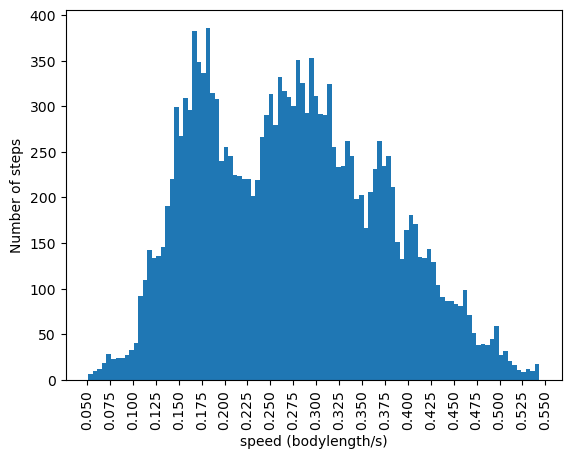

In [10]:
'''
How to partition the speed categories into slow, medium, fast?
First, see if there are any boundaries evident in the speed data
'''


# load the gait_speeds data into a dataframe
# 'cruising' does not matter here because we only measure steps during cruising
gaitspeed_df = pd.read_excel(data_file, sheet_name='gait_speeds', index_col=None)
speed_col = 'speed (bodylength/s)' # 'speed (bodylength/s)' or 'speed (mm/s)' 
# print(np.unique(gaitspeed_df['gaits_lateral'].values)) # just to see what we have
# print(gaitspeed_df.columns) # just to see what is there

import matplotlib.ticker as ticker
tick_spacing = 0.025
fig, ax = plt.subplots(1,1)
ax.hist(gaitspeed_df[speed_col].values, bins=100)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks(rotation = 90)
ax.set_ylabel('Number of steps')
ax.set_xlabel(speed_col)
plt.show()

'''
looks like maybe different bins ... 
but I worry that these could be from different days or batches?
'''

# partition speeds into three groups: low, medium, high
speed_boundaries = [0,0.225,0.35,1]

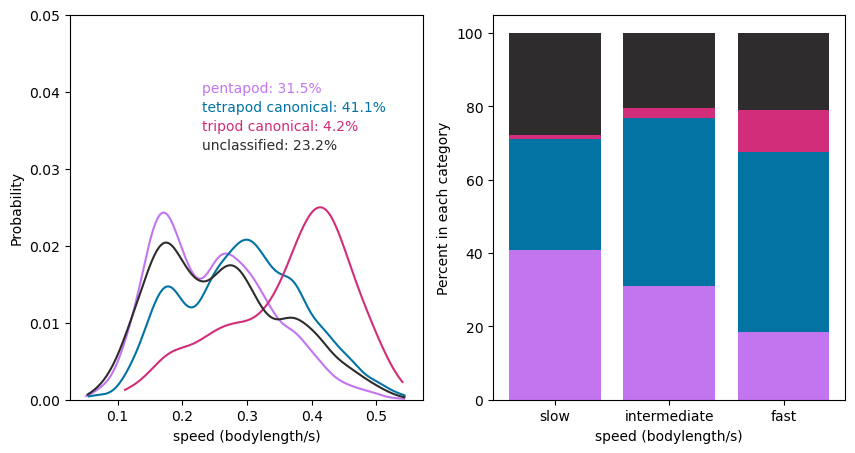

In [11]:
'''
VERSION 1 = 4 gait categories: unclassified, pentapod, tetrapod, tripod

% in each gait are slightly different here compared to kinematics overview notebook
In kinematics overview, I report average value across all individuals
In this analysis, I report average value across all video frames 
    (some individuals have more frames than others)
'''
# set up categories and values to plot
categories = ['pentapod','tetrapod_canonical','tripod_canonical']
# include unclassified?
include_unclassified = True

# set up figure
f,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

# get LEFT axis
ax1, category_lists, category_names, color_dict = gaitDensityPlot(ax1, categories, gaitspeed_df, speed_col, include_unclassified)

'''
RIGHT = % in each gait in speed categories low, medium, high
'''
# all_speeds = []
# for speed_vals in category_lists:
#     all_speeds.extend(speed_vals)
# plot distribution of different speeds?
# ax2 = sns.histplot(all_speeds, binwidth = 0.01, ax=ax2)

ax2 = speedPartitionPlot(ax2, speed_boundaries, category_lists, category_names, color_dict)

# fake legend for left plot
legend_maxy = 0.04
legend_yincrement = 0.0025
legend_x = 0.23
# how many are in each gait category
percents_in_category = [np.round(len(x) * 100 / np.sum([len(x) for x in category_lists]),1) for x in category_lists]
for i, catname in enumerate(category_names):
    ax1.text(legend_x, legend_maxy-(i*legend_yincrement), 
            catname + ': ' + str(percents_in_category[i]) + '%', 
            color=color_dict[catname.replace(' ','_')])
ax1.set_xlabel(speed_col)
ax1.set_ylim([0,0.05])

plt.show()

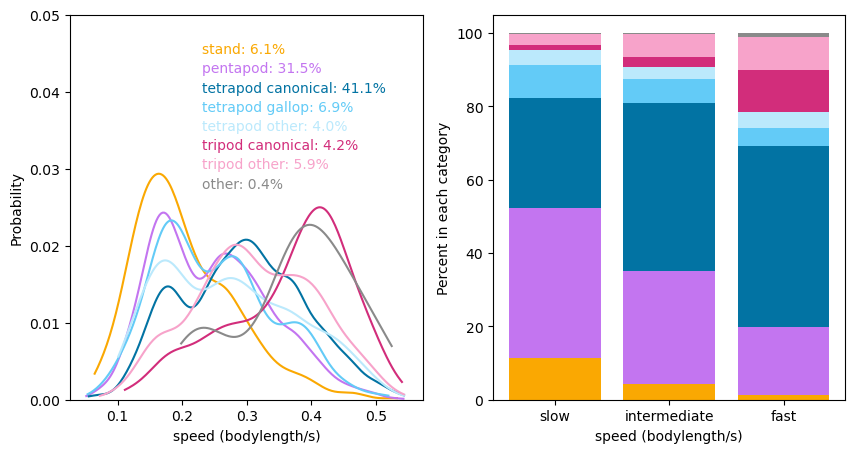

In [12]:
'''
VERSION 2 = all hexapod gait categories
'''

# set up categories and values to plot
categories = ['stand','pentapod','tetrapod_canonical','tetrapod_gallop','tetrapod_other',
              'tripod_canonical','tripod_other','other']
# include unclassified?
include_unclassified = False

# set up figure
f,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

# get LEFT axis
ax1, category_lists, category_names, color_dict = gaitDensityPlot(ax1, categories, gaitspeed_df, speed_col, include_unclassified)

'''
RIGHT = % in each gait in speed categories low, medium, high
'''
# all_speeds = []
# for speed_vals in category_lists:
#     all_speeds.extend(speed_vals)
# plot distribution of different speeds?
# ax2 = sns.histplot(all_speeds, binwidth = 0.01, ax=ax2)

# partition speeds into three groups: low, medium, high
ax2 = speedPartitionPlot(ax2, speed_boundaries, category_lists, category_names, color_dict)

# fake legend for left plot
legend_maxy = 0.045
legend_yincrement = 0.0025
legend_x = 0.23
# how many are in each gait category
percents_in_category = [np.round(len(x) * 100 / np.sum([len(x) for x in category_lists]),1) for x in category_lists]
for i, catname in enumerate(category_names):
    ax1.text(legend_x, legend_maxy-(i*legend_yincrement), 
            catname + ': ' + str(percents_in_category[i]) + '%', 
            color=color_dict[catname.replace(' ','_')])
ax1.set_xlabel(speed_col)
ax1.set_ylim([0,0.05])

plt.show()

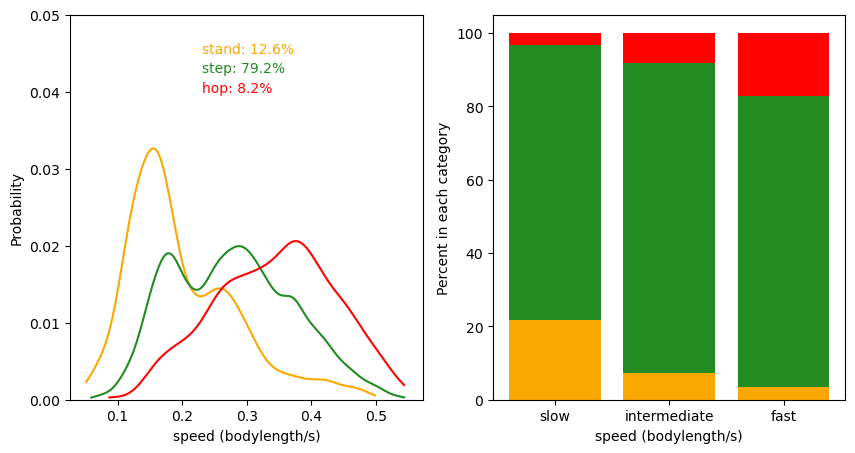

In [13]:
'''
VERSION 3 = rear legs
'''

# set up categories and values to plot
categories = ['stand','step','hop']
# include unclassified?
include_unclassified = False

# set up figure
f,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

# get LEFT axis
ax1, category_lists, category_names, color_dict = gaitDensityPlot(ax1, categories, gaitspeed_df, speed_col, include_unclassified)

'''
RIGHT = % in each gait in speed categories low, medium, high
'''
# all_speeds = []
# for speed_vals in category_lists:
#     all_speeds.extend(speed_vals)
# plot distribution of different speeds?
# ax2 = sns.histplot(all_speeds, binwidth = 0.01, ax=ax2)

# partition speeds into three groups: low, medium, high
speed_boundaries = [0,0.25,0.35,1]
ax2 = speedPartitionPlot(ax2, speed_boundaries, category_lists, category_names, color_dict)

# fake legend for left plot
legend_maxy = 0.045
legend_yincrement = 0.0025
legend_x = 0.23
# how many are in each gait category
percents_in_category = [np.round(len(x) * 100 / np.sum([len(x) for x in category_lists]),1) for x in category_lists]
for i, catname in enumerate(category_names):
    ax1.text(legend_x, legend_maxy-(i*legend_yincrement), 
            catname + ': ' + str(percents_in_category[i]) + '%', 
            color=color_dict[catname.replace(' ','_')])
ax1.set_xlabel(speed_col)
ax1.set_ylim([0,0.05])

plt.show()

# Size vs. Speed
* area vs. speed (mm/s and bodylength/s)
* length vs. speed
* width vs. speed
* width/length ('chubbiness') vs. speed

In [14]:
xl = pd.ExcelFile(data_file)
print(xl.sheet_names)

['path_summaries', 'step_timing', 'step_summaries', 'gait_summaries', 'gait_speeds']


In [15]:
path_summaries_df = xl.parse('path_summaries') # has size and speed info
print(path_summaries_df.columns)
path_summaries_df.head(3)

Index(['Identifier', 'treatment', 'individual', 'date',
       'Scale (pixels in 1mm)', 'Body Size (mm^2)', 'Body Length (mm)',
       'Body Width (mm)', 'Body Width/Length Ratio', 'Duration analyzed (sec)',
       'Distance traveled (mm)', 'Speed (mm/sec)',
       'Speed (body lengths / sec)', 'Percentage of time cruising',
       'Speed (mm/sec cruising)', 'Speed (body lengths / sec cruising)',
       'Total bearing change (deg)', 'Bearing change (deg) / sec',
       'Bearing change (deg) / sec cruising', 'Number of stops', 'Stops / sec',
       'Number of turns', 'Turns / sec'],
      dtype='object')


,Identifier,treatment,individual,date,Scale (pixels in 1mm),Body Size (mm^2),Body Length (mm),Body Width (mm),Body Width/Length Ratio,Duration analyzed (sec),...,Percentage of time cruising,Speed (mm/sec cruising),Speed (body lengths / sec cruising),Total bearing change (deg),Bearing change (deg) / sec,Bearing change (deg) / sec cruising,Number of stops,Stops / sec,Number of turns,Turns / sec
0,iw_11dec_tardigrade01_exemplaris,11dec,tardigrade01,11dec,956.03,0.017560,0.265809,0.089788,0.337792,112.6362,...,93.058918,0.047823,0.179915,2237.019467,19.860573,21.341934,10,0.088781,5,0.044391
1,iw_11dec_tardigrade02_exemplaris,11dec,tardigrade02,11dec,956.03,0.013457,0.239711,0.073674,0.307344,110.1818,...,84.213421,0.053403,0.222783,1648.051800,14.957568,17.761502,11,0.099835,1,0.009076
2,iw_11dec_tardigrade03_exemplaris,11dec,tardigrade03,11dec,956.03,0.017790,0.271046,0.089991,0.332014,106.0909,...,59.297344,0.040661,0.150015,2372.522533,22.363111,37.713512,35,0.329906,15,0.141388


Length vs Width ρ = 0.89 p = 0.0


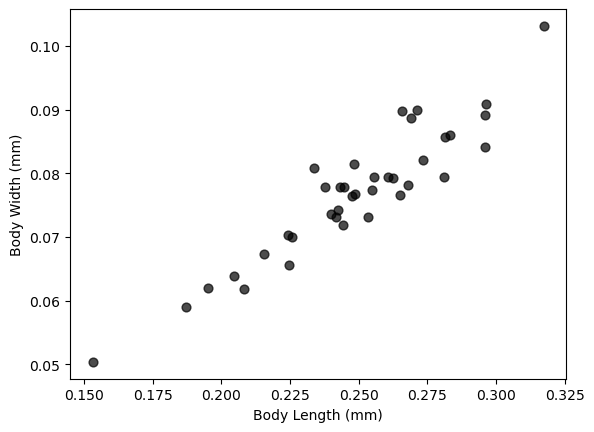

In [28]:
# length vs width
lengths = path_summaries_df['Body Length (mm)'].values
widths = path_summaries_df['Body Width (mm)'].values
plt.scatter(lengths,widths,s=40,alpha=0.7,color='k')
plt.xlabel('Body Length (mm)')
plt.ylabel('Body Width (mm)')
r,p = stats.spearmanr(lengths,widths)
print('Length vs Width ρ =', np.round(r,2), 'p =', np.round(p,2))
plt.show()

Tardigrade Area (mm^2) vs. Speed (mm/sec) ρ = 0.4 p = 0.01
Tardigrade Area (mm^2) vs. Speed (bodylength/sec) ρ = 0.16 p = 0.35
Tardigrade Area (mm^2) vs. Cruising Speed (mm/sec) ρ = 0.42 p = 0.01
Tardigrade Area (mm^2) vs. Cruising Speed (bodylength/sec) ρ = 0.17 p = 0.32


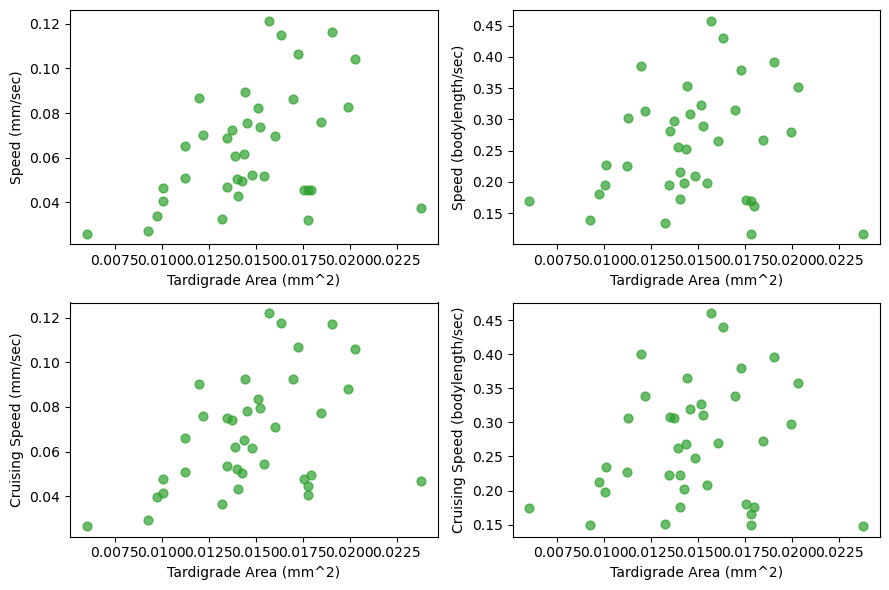

In [16]:
# Area vs. Speed
fig, axes = plt.subplots(2,2, figsize=(9,6))
[[a1,a2],[a3,a4]] = axes

areas = path_summaries_df['Body Size (mm^2)'].values
speed_mm = path_summaries_df['Speed (mm/sec)'].values
speed_bodylength = path_summaries_df['Speed (body lengths / sec)'].values
cruising_speed_mm = path_summaries_df['Speed (mm/sec cruising)'].values
cruising_speed_bodylength = path_summaries_df['Speed (body lengths / sec cruising)'].values

def scat(ax, x, y, xlab, ylab, col = 'tab:green'):
    ax.scatter(x,y,s=40,alpha=0.7,color=col)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    r,p = stats.spearmanr(x,y)
    print(xlab + ' vs. ' + ylab + ' ρ =', np.round(r,2), 'p =', np.round(p,2))
    return ax

a1 = scat(a1, areas, speed_mm, 'Tardigrade Area (mm^2)', 'Speed (mm/sec)')
a2 = scat(a2, areas, speed_bodylength, 'Tardigrade Area (mm^2)', 'Speed (bodylength/sec)')
a3 = scat(a3, areas, cruising_speed_mm, 'Tardigrade Area (mm^2)', 'Cruising Speed (mm/sec)')
a4 = scat(a4, areas, cruising_speed_bodylength, 'Tardigrade Area (mm^2)', 'Cruising Speed (bodylength/sec)')

plt.tight_layout()
plt.show()

Body Length (mm) vs. Speed (mm/sec) ρ = 0.42 p = 0.01
Body Length (mm) vs. Speed (bodylength/sec) ρ = 0.18 p = 0.28
Body Length (mm) vs. Cruising Speed (mm/sec) ρ = 0.45 p = 0.0
Body Length (mm) vs. Cruising Speed (bodylength/sec) ρ = 0.19 p = 0.25


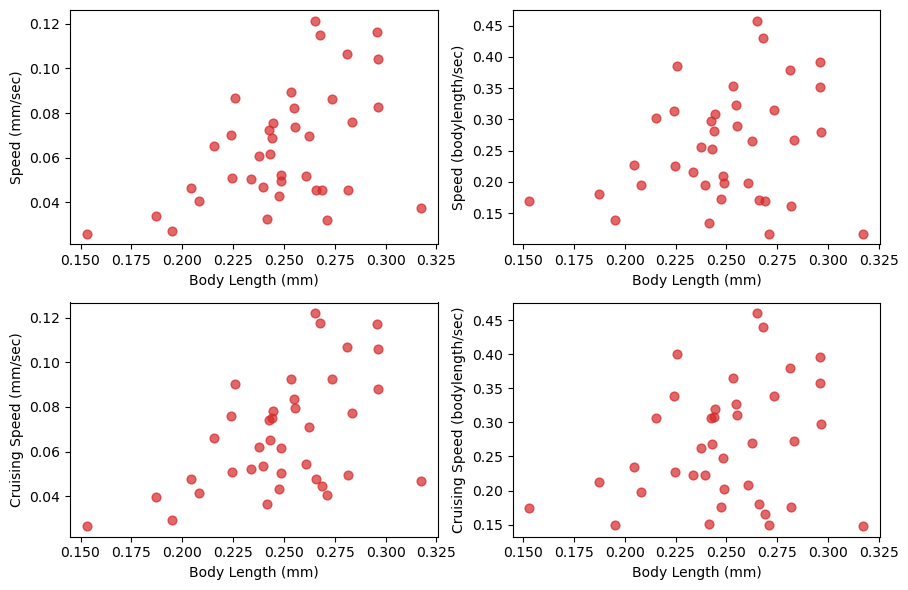

In [17]:
# Length vs. Speed
fig, axes = plt.subplots(2,2, figsize=(9,6))
[[a1,a2],[a3,a4]] = axes

lengths = path_summaries_df['Body Length (mm)'].values
speed_mm = path_summaries_df['Speed (mm/sec)'].values
speed_bodylength = path_summaries_df['Speed (body lengths / sec)'].values
cruising_speed_mm = path_summaries_df['Speed (mm/sec cruising)'].values
cruising_speed_bodylength = path_summaries_df['Speed (body lengths / sec cruising)'].values

col = 'tab:red'
a1 = scat(a1, lengths, speed_mm, 'Body Length (mm)', 'Speed (mm/sec)', col)
a2 = scat(a2, lengths, speed_bodylength, 'Body Length (mm)', 'Speed (bodylength/sec)', col)
a3 = scat(a3, lengths, cruising_speed_mm, 'Body Length (mm)', 'Cruising Speed (mm/sec)', col)
a4 = scat(a4, lengths, cruising_speed_bodylength, 'Body Length (mm)', 'Cruising Speed (bodylength/sec)', col)

plt.tight_layout()
plt.show()

Body Width (mm) vs. Speed (mm/sec) ρ = 0.22 p = 0.18
Body Width (mm) vs. Speed (bodylength/sec) ρ = -0.03 p = 0.88
Body Width (mm) vs. Cruising Speed (mm/sec) ρ = 0.25 p = 0.12
Body Width (mm) vs. Cruising Speed (bodylength/sec) ρ = -0.01 p = 0.96


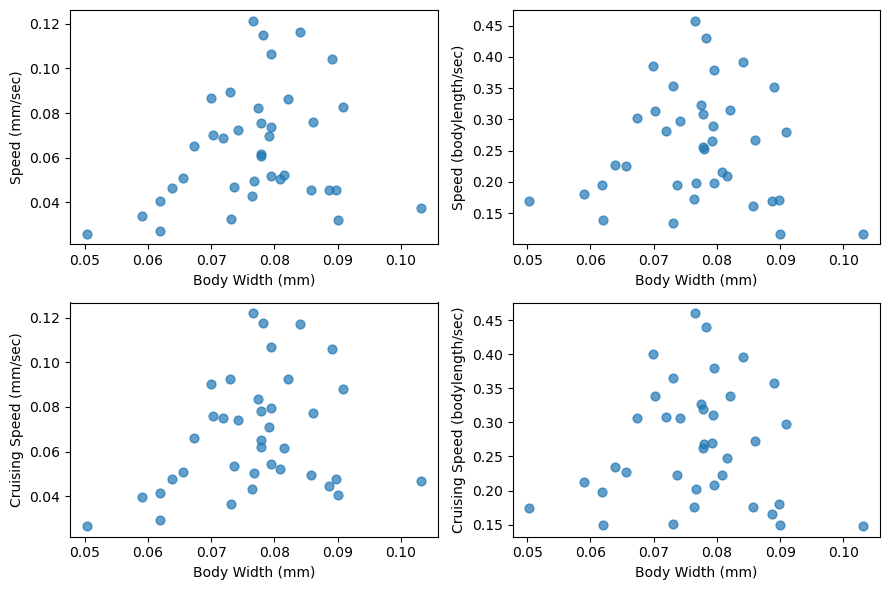

In [18]:
# Width vs. Speed
fig, axes = plt.subplots(2,2, figsize=(9,6))
[[a1,a2],[a3,a4]] = axes

widths = path_summaries_df['Body Width (mm)'].values
speed_mm = path_summaries_df['Speed (mm/sec)'].values
speed_bodylength = path_summaries_df['Speed (body lengths / sec)'].values
cruising_speed_mm = path_summaries_df['Speed (mm/sec cruising)'].values
cruising_speed_bodylength = path_summaries_df['Speed (body lengths / sec cruising)'].values

col = 'tab:blue'
a1 = scat(a1, widths, speed_mm, 'Body Width (mm)', 'Speed (mm/sec)', col)
a2 = scat(a2, widths, speed_bodylength, 'Body Width (mm)', 'Speed (bodylength/sec)', col)
a3 = scat(a3, widths, cruising_speed_mm, 'Body Width (mm)', 'Cruising Speed (mm/sec)', col)
a4 = scat(a4, widths, cruising_speed_bodylength, 'Body Width (mm)', 'Cruising Speed (bodylength/sec)', col)

plt.tight_layout()
plt.show()

Width:Length Ratio vs. Speed (mm/sec) ρ = -0.59 p = 0.0
Width:Length Ratio vs. Speed (bodylength/sec) ρ = -0.56 p = 0.0
Width:Length Ratio vs. Cruising Speed (mm/sec) ρ = -0.57 p = 0.0
Width:Length Ratio vs. Cruising Speed (bodylength/sec) ρ = -0.55 p = 0.0


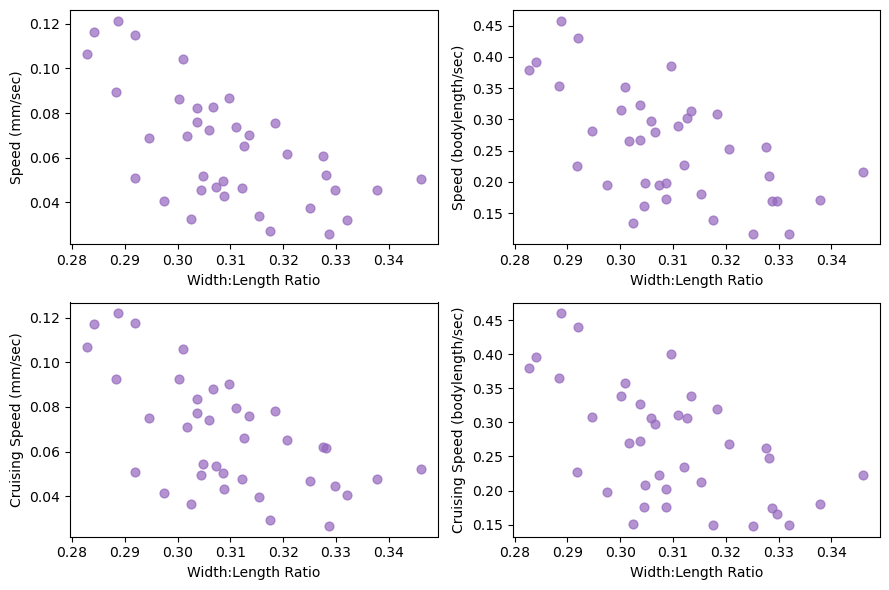

In [19]:
# Width/Length Ratio vs. Speed
fig, axes = plt.subplots(2,2, figsize=(9,6))
[[a1,a2],[a3,a4]] = axes

ratios = path_summaries_df['Body Width/Length Ratio'].values
speed_mm = path_summaries_df['Speed (mm/sec)'].values
speed_bodylength = path_summaries_df['Speed (body lengths / sec)'].values
cruising_speed_mm = path_summaries_df['Speed (mm/sec cruising)'].values
cruising_speed_bodylength = path_summaries_df['Speed (body lengths / sec cruising)'].values

col = 'tab:purple'
a1 = scat(a1, ratios, speed_mm, 'Width:Length Ratio', 'Speed (mm/sec)', col)
a2 = scat(a2, ratios, speed_bodylength, 'Width:Length Ratio', 'Speed (bodylength/sec)', col)
a3 = scat(a3, ratios, cruising_speed_mm, 'Width:Length Ratio', 'Cruising Speed (mm/sec)', col)
a4 = scat(a4, ratios, cruising_speed_bodylength, 'Width:Length Ratio', 'Cruising Speed (bodylength/sec)', col)

plt.tight_layout()
plt.show()

# Speed vs. offsets

In [20]:
step_summaries_df = xl.parse('step_summaries') # has size and speed info
print(step_summaries_df.columns)
step_summaries_df.head(3)

Index(['Identifier', 'treatment', 'individual',
       'Stance duration (lateral legs)', 'Swing duration (lateral legs)',
       'Gait cycle (lateral legs)', 'Duty factor (lateral legs)',
       'mm per step (lateral legs)', 'bodylength per step (lateral legs)',
       'Stance duration (rear legs)', 'Swing duration (rear legs)',
       'Gait cycle (rear legs)', 'Duty factor (rear legs)',
       'mm per step (rear legs)', 'bodylength per step (rear legs)',
       'Metachronal lag (lateral legs)',
       'Metachronal lag (normalized, lateral legs)',
       'Metachronal lag Left-Right Ratio',
       'Anterior swing offsets (lateral legs)',
       'Anterior swing offsets (normalized, lateral legs)',
       'Opposite swing offsets (lateral legs)',
       'Opposite swing offsets (normalized, lateral legs)',
       'Opposite swing offsets (rear legs)',
       'Opposite swing offsets (normalized, rear legs)'],
      dtype='object')


,Identifier,treatment,individual,Stance duration (lateral legs),Swing duration (lateral legs),Gait cycle (lateral legs),Duty factor (lateral legs),mm per step (lateral legs),bodylength per step (lateral legs),Stance duration (rear legs),...,bodylength per step (rear legs),Metachronal lag (lateral legs),"Metachronal lag (normalized, lateral legs)",Metachronal lag Left-Right Ratio,Anterior swing offsets (lateral legs),"Anterior swing offsets (normalized, lateral legs)",Opposite swing offsets (lateral legs),"Opposite swing offsets (normalized, lateral legs)",Opposite swing offsets (rear legs),"Opposite swing offsets (normalized, rear legs)"
0,iw_11dec_tardigrade01_exemplaris,11dec,tardigrade01,1.038565,0.291355,1.329919,0.775582,0.045352,0.170799,0.531367,...,0.086696,1.638500,1.229424,0.345009,0.814083,0.610685,0.892893,0.669637,0.482643,0.495681
1,iw_11dec_tardigrade02_exemplaris,11dec,tardigrade02,0.630924,0.259400,0.890324,0.702079,0.040009,0.167006,0.445486,...,0.115837,0.799484,0.896598,0.301717,0.394815,0.442986,0.419510,0.472992,0.390471,0.485731
2,iw_11dec_tardigrade03_exemplaris,11dec,tardigrade03,1.185420,0.313980,1.499400,0.784704,0.049132,0.181463,0.717000,...,0.108222,1.594462,1.064675,0.323230,0.799000,0.533451,0.915417,0.610966,0.588583,0.532696


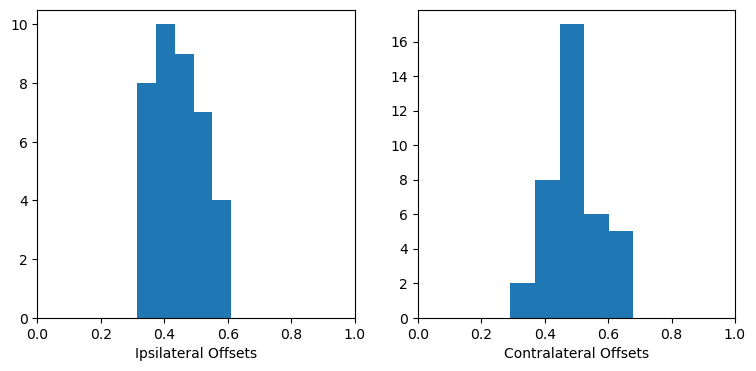

In [39]:
fig, [a1,a2] = plt.subplots(1,2, figsize=(9,4))
contra_offsets = step_summaries_df['Opposite swing offsets (normalized, lateral legs)'].values
ipsi_offsets = step_summaries_df['Anterior swing offsets (normalized, lateral legs)'].values
a1.hist(ipsi_offsets, bins=5)
a1.set_xlabel('Ipsilateral Offsets')
a1.set_xlim([0,1])

a2.hist(contra_offsets, bins=5)
a2.set_xlabel('Contralateral Offsets')
a2.set_xlim([0,1])

plt.show()

Ipsilateral Offset vs. Speed (mm/s cruising) ρ = -0.16 p = 0.34
Contralateral Offset vs. Speed (mm/s cruising) ρ = -0.09 p = 0.59
Ipsilateral Offset vs. Speed (bodylength/s cruising) ρ = -0.29 p = 0.08
Contralateral Offset vs. Speed (bodylength/s cruising) ρ = -0.19 p = 0.24


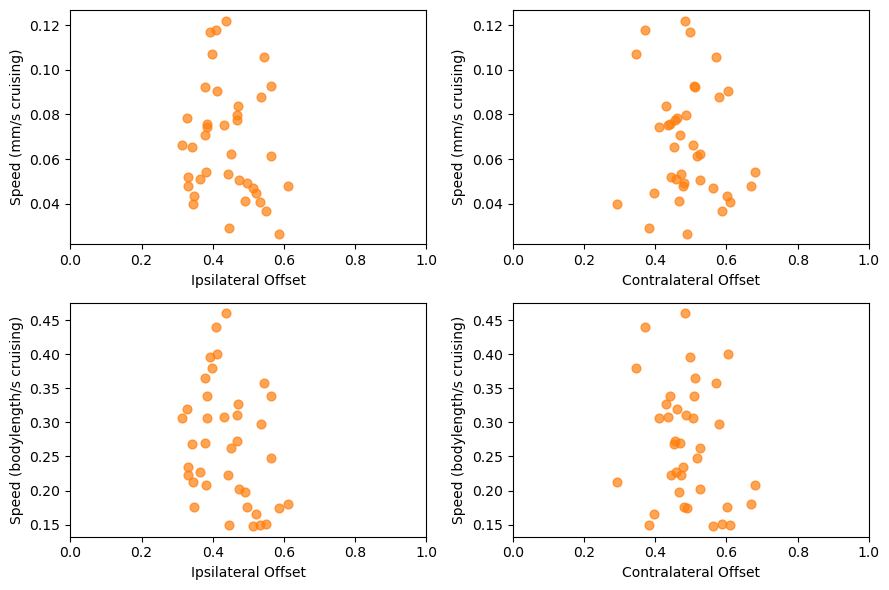

In [33]:
# Cruising Speed vs. Anterior and Opposite Offsets
fig, axes = plt.subplots(2,2, figsize=(9,6))
[[a1,a2],[a3,a4]] = axes

contra_offsets = step_summaries_df['Opposite swing offsets (normalized, lateral legs)'].values
ipsi_offsets = step_summaries_df['Anterior swing offsets (normalized, lateral legs)'].values
cruising_speed_mm = path_summaries_df['Speed (mm/sec cruising)'].values
cruising_speed_bodylength = path_summaries_df['Speed (body lengths / sec cruising)'].values

col = 'tab:orange'
a1 = scat(a1, ipsi_offsets, cruising_speed_mm, 
          'Ipsilateral Offset', 'Speed (mm/s cruising)', col)
a2 = scat(a2, contra_offsets, cruising_speed_mm, 
          'Contralateral Offset', 'Speed (mm/s cruising)', col)
a3 = scat(a3, ipsi_offsets, cruising_speed_bodylength, 
          'Ipsilateral Offset', 'Speed (bodylength/s cruising)', col)
a4 = scat(a4, contra_offsets, cruising_speed_bodylength, 
          'Contralateral Offset', 'Speed (bodylength/s cruising)', col)

a1.set_xlim([0,1])
a2.set_xlim([0,1])
a3.set_xlim([0,1])
a4.set_xlim([0,1])
plt.tight_layout()
plt.show()

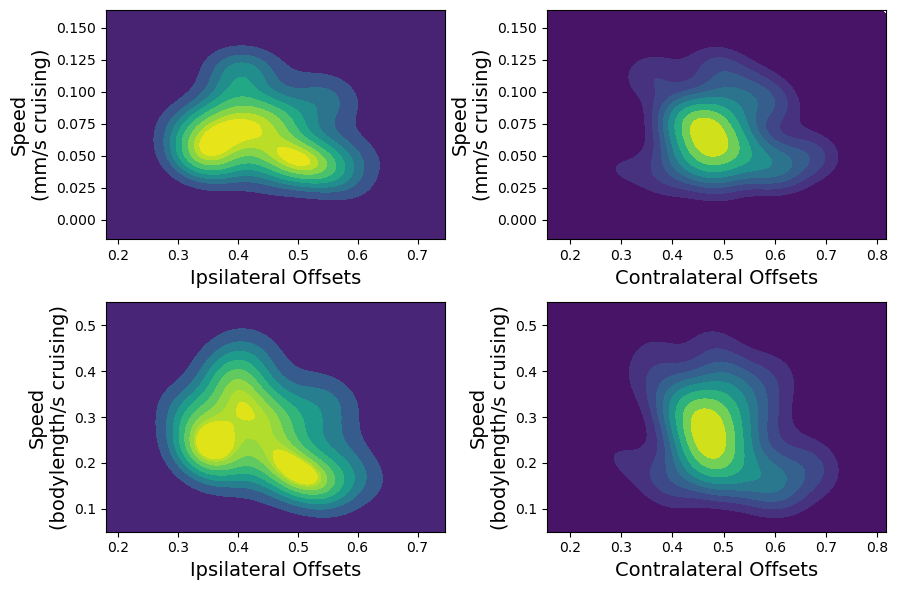

In [51]:
# Cruising Speed vs. Anterior and Opposite Offsets
fig, axes = plt.subplots(2,2, figsize=(9,6))
[[a1,a2],[a3,a4]] = axes

contra_offsets = step_summaries_df['Opposite swing offsets (normalized, lateral legs)'].values
ipsi_offsets = step_summaries_df['Anterior swing offsets (normalized, lateral legs)'].values
cruising_speed_mm = path_summaries_df['Speed (mm/sec cruising)'].values
cruising_speed_bodylength = path_summaries_df['Speed (body lengths / sec cruising)'].values


a1 = sns.kdeplot(ax=a1, x=ipsi_offsets, y=cruising_speed_mm, fill=True, cmap='viridis', thresh=0, levels=10)
a1.set_xlabel('Ipsilateral Offsets', fontsize=14)
a1.set_ylabel('Speed\n(mm/s cruising)', fontsize=14)
a2 = sns.kdeplot(ax=a2, x=contra_offsets, y=cruising_speed_mm, fill=True, cmap='viridis', thresh=0, levels=10)
a2.set_xlabel('Contralateral Offsets', fontsize=14)
a2.set_ylabel('Speed\n(mm/s cruising)', fontsize=14)
a3 = sns.kdeplot(ax=a3, x=ipsi_offsets, y=cruising_speed_bodylength, fill=True, cmap='viridis', thresh=0, levels=10)
a3.set_xlabel('Ipsilateral Offsets', fontsize=14)
a3.set_ylabel('Speed\n(bodylength/s cruising)', fontsize=14)
a4 = sns.kdeplot(ax=a4, x=contra_offsets, y=cruising_speed_bodylength, fill=True, cmap='viridis', thresh=0, levels=10)
a4.set_xlabel('Contralateral Offsets', fontsize=14)
a4.set_ylabel('Speed\n(bodylength/s cruising)', fontsize=14)

a3.set_ylim([0.05,0.55])
a4.set_ylim([0.05,0.55])
plt.tight_layout()
plt.show()